<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
%pip install ydata_profiling

  Using cached ydata_profiling-4.18.0-py2.py3-none-any.whl.metadata (22 kB)
  Using cached scipy-1.16.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pandas-2.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached matplotlib-3.10.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached pydantic-2.12.5-py3-none-any.whl.metadata (90 kB)
  Using cached pyyaml-6.0.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.4 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
  Using cached numpy-2.3.5-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached minify_html-0.18.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (18 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached phik-0.12.5-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.6 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tqdm-4.67.1-py3-non

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport

random.seed(42)
np.random.seed(42)

/Users/obbrnu/Study/venv1/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Сиды фиксируются для того, чтобы была возможность точно вопроизвести полученные результаты (исключить эффект "случайности" при различных запусках у случайных величин). Сиды фиксируем для воспроизводимости результатов


# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


**Ваш ответ здесь.**

In [5]:
missing_columns = df_train.columns[df_train.isnull().any()]
print(f'missing_columns: { missing_columns.to_list() }')

duplicates_count = df_train.duplicated().sum()
print(f'duplicates_count: { duplicates_count }')

missing_columns: ['mileage', 'engine', 'max_power', 'torque', 'seats']
duplicates_count: 985


In [6]:
%pip install ipywidgets

  Using cached ipywidgets-8.1.8-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.15-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.16-py3-none-any.whl.metadata (20 kB)
Using cached ipywidgets-8.1.8-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.16-py3-none-any.whl (914 kB)
Using cached widgetsnbextension-4.0.15-py3-none-any.whl (2.2 MB)

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
profile = ProfileReport(df_train, minimal=True)
display(profile)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


Достаточно много пропущенных, количество дубликатов не так критично. Встречаются как текстовые(5), так числовые(4) и категориальные(4) признаки. 
Среди признаков встречаются очевидно сильные кореляции, например, `year`, `km_driven` и `selling_price`. Среди `selling_price` есть очень дорогие экземпляры (можно счиать выбросом, может исказать анализ), аналогично и в `km_driven`. В столбе `fuel` значительно преобладают категории `Diesel` / `Petrol`. В столбе `seller_type` - `Individual`. В столбе `transmission` - `Manual`. В столбе `owner` - `First Owner`.  

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [8]:
display('train.describe():', df_train.describe())
display('test.describe():', df_test.describe())

display('train.describe(include=["object"]):', df_train.describe(include=['object']))
display('test.describe(include=["object"]):', df_test.describe(include=['object']))

'train.describe():'

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

'test.describe():'

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

'train.describe(include=["object"]):'

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

'test.describe(include=["object"]):'

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

Основные статистики примерно равны (не считаем количественные признаки). Данные поделены в соотношении примерно 7:1. 

Из-за этого можно сказать, что данные разбиты хорошо и что модель должна показать хорошее качество на таких данных.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [9]:
features = df_train.drop(columns=['selling_price'])
duplicating_features = features[features.duplicated()]
print(f'duplicating_features_count: { len(duplicating_features) }')

display('duplicates:', duplicating_features)

df_train = df_train.drop_duplicates(subset=features.columns, keep='first')
df_train.reset_index(drop=True)

duplicating_features_count: 1159


'duplicates:'

name  year  km_driven    fuel  \
254                   Hyundai Grand i10 Sportz  2017      35000  Petrol   
258                           Maruti Swift VXI  2012      50000  Petrol   
268                     Maruti Swift Dzire VXI  2014      70000  Petrol   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017       9000  Diesel   
325                              Lexus ES 300h  2019      20000  Petrol   
...                                        ...   ...        ...     ...   
6947                    Chevrolet Spark 1.0 LS  2010      60000  Petrol   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6989                    Maruti Swift Dzire VDI  2015      50000  Diesel   
6997                           Tata Indigo CR4  2013      25000  Diesel   
6998                           Tata Indigo CR4  2013      25000  Diesel   

     seller_type transmission         owner     mileage   engine   max_power  \
254   Individual       Manual   First Owner   18.9 kmpl  1197 CC      82 bhp   
258   Individual       Manual  Second Owner   18.6 kmpl  1197 CC    85.8 bhp   
268   Individual       Manual  Second Owner   19.1 kmpl  1197 CC    85.8 bhp   
324       Dealer    Automatic   First Owner   13.6 kmpl  1999 CC     177 bhp   
325       Dealer    Automatic   First Owner  22.37 kmpl  2487 CC  214.56 bhp   
...          ...          ...           ...         ...      ...         ...   
6947  Individual       Manual  Second Owner   18.0 kmpl   995 CC      62 bhp   
6984  Individual       Manual   First Owner   24.4 kmpl  1498 CC   98.63 bhp   
6989  Individual       Manual   First Owner  26.59 kmpl  1248 CC      74 bhp   
6997  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   
6998  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   

                   torque  seats  
254        114Nm@ 4000rpm    5.0  
258        114Nm@ 4000rpm    5.0  
268        114Nm@ 4000rpm    5.0  
324   430Nm@ 1750-2500rpm    5.0  
325   202Nm@ 3600-5200rpm    5.0  
...                   ...    ...  
6947      90.3Nm@ 4200rpm    5.0  
6984  215Nm@ 1750-3000rpm    5.0  
6989       190Nm@ 2000rpm    5.0  
6997  140Nm@ 1800-3000rpm    5.0  
6998  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 12 columns]

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [10]:
# idk, было уже, закомментировал
# df_train = df_train.drop_duplicates(subset=X_train.columns, keep='first')

In [11]:
assert df_train.shape == (5840, 13)

Могут быть записи, связанные с 1 автомобилем (например, его первая и вторая продажи), но это все равно должно отражать характер рынка (например, как количество владельцев или процесс использования влияет на цену).

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [12]:
import re

def process_torque(torque):
    if pd.isna(torque):
        return pd.NA, pd.NA
    
    torque = torque.replace(',', '')
    numbers = re.findall(r'(\d+\.?\d*)', torque)
    
    if len(numbers) > 0:
        torque_val = float(numbers[0])
        if 'kgm' in torque.lower():
            torque_val = torque_val * 9.80665

        if len(numbers) > 1:
            return torque_val, float(numbers[1])
        else:
            return torque_val, pd.NA
    else:
        return pd.NA, pd.NA


both_datasets = [df_train, df_test]
for df in both_datasets:
    for columns_with_simple_measurement in ['mileage', 'engine', 'max_power']:
        df[columns_with_simple_measurement] = df[columns_with_simple_measurement].astype(str).str.extract('(\d+\.?\d*)').astype(float)
    
    df[['torque', 'max_torque_rpm']] = pd.DataFrame(
        df['torque'].apply(process_torque).tolist(), 
        index=df.index,
    )

display('train, measurement feaures processed:', df_train)
display('test, measurement feaures processed:', df_test)

/var/folders/7_/vcg36nz547b3lv5ft63fzcbc0000gn/T/ipykernel_32069/2152478519.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_with_simple_measurement] = df[columns_with_simple_measurement].astype(str).str.extract('(\d+\.?\d*)').astype(float)
/var/folders/7_/vcg36nz547b3lv5ft63fzcbc0000gn/T/ipykernel_32069/2152478519.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_with_simple_measurement] = df[columns_with_simple_measurement].astype(str).str.extract('(\d+\.?\d*)').astype(float)


'train, measurement feaures processed:'

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
6992            Hyundai Santro Xing GLS  2008         120000     191000   
6993  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6994                  Hyundai i20 Magna  2013         320000     110000   
6995              Hyundai Verna CRDi SX  2007         135000     119000   
6996             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
6992  Petrol  Individual       Manual           First Owner    17.92  1086.0   
6993  Petrol  Individual       Manual          Second Owner    18.90   998.0   
6994  Petrol  Individual       Manual           First Owner    18.50  1197.0   
6995  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
6996  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power      torque  seats max_torque_rpm  
0         74.00       190.0    5.0         2000.0  
1        103.52       250.0    5.0         1500.0  
2         90.00   219.66896    5.0         1750.0  
3         88.20  112.776475    5.0         4500.0  
4         81.86      113.75    5.0         4000.0  
...         ...         ...    ...            ...  
6992      62.10        96.1    5.0         3000.0  
6993      67.10        90.0    5.0         3500.0  
6994      82.85       113.7    5.0         4000.0  
6995     110.00    235.3596    5.0         1900.0  
6996      73.90       190.0    5.0         2000.0  

[5840 rows x 14 columns]

'test, measurement feaures processed:'

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner  mileage  engine  \
0    Diesel  Individual       Manual   First Owner    14.00  2498.0   
1    Diesel  Individual       Manual   First Owner    21.50  1497.0   
2    Petrol  Individual    Automatic   First Owner    12.90  1799.0   
3    Diesel  Individual       Manual   First Owner    25.10  1498.0   
4    Petrol  Individual       Manual  Second Owner    16.50  1172.0   
..      ...         ...          ...           ...      ...     ...   
995  Petrol  Individual       Manual  Second Owner    19.81  1086.0   
996  Petrol  Individual       Manual  Second Owner    18.60  1197.0   
997  Diesel  Individual       Manual   First Owner    23.00  1396.0   
998  Petrol  Individual       Manual   First Owner    20.36  1197.0   
999  Diesel  Individual       Manual   First Owner    26.00  1498.0   

     max_power     torque  seats max_torque_rpm  
0       112.00      260.0    7.0         1800.0  
1       108.50      260.0    5.0         1500.0  
2       130.00      172.0    5.0         4300.0  
3        98.60      200.0    5.0         1750.0  
4        65.00       96.0    5.0         3000.0  
..         ...        ...    ...            ...  
995      68.05      99.04    5.0         4500.0  
996      81.83      114.7    5.0         4000.0  
997      90.00  219.66896    5.0         1750.0  
998      78.90      111.8    5.0         4000.0  
999      98.60      200.0    5.0         1750.0  

[1000 rows x 14 columns]

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [13]:
both_datasets = [df_train, df_test]
for df in both_datasets:
    columns = df.columns[df.isnull().any()]
    df[columns] = df[columns].fillna(df_train[columns].median())

    assert df[columns].isna().sum().sum() == 0

/var/folders/7_/vcg36nz547b3lv5ft63fzcbc0000gn/T/ipykernel_32069/1339377517.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns] = df[columns].fillna(df_train[columns].median())
/var/folders/7_/vcg36nz547b3lv5ft63fzcbc0000gn/T/ipykernel_32069/1339377517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns].fillna(df_train[columns].median())
/var/folders/7_/vcg36nz547b3lv5ft63fzcbc0000gn/T/ipykernel_32069/1339377517.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is

Медиана устойчива к выбросам или смещенным распределениям.

Ответ: "- По тренировочным данным для `train` и `test`", так как таким образом гарантируем консистентность модели (то есть одинаковое поведение на `train` и `test`).

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [14]:
both_datasets = [df_train, df_test]
for df in both_datasets:
    for int_column in ['engine', 'seats']: 
        df[int_column] = df[int_column].astype(int)

/var/folders/7_/vcg36nz547b3lv5ft63fzcbc0000gn/T/ipykernel_32069/4127759137.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[int_column] = df[int_column].astype(int)
/var/folders/7_/vcg36nz547b3lv5ft63fzcbc0000gn/T/ipykernel_32069/4127759137.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[int_column] = df[int_column].astype(int)


`seats` можно рассмотреть категориальным, так как этот признак может принимать относительно небольшое конечное количество значений (только целые числа, >0, <n)

p.s.: точное значение `n` не знаю, но знаю, что оно небольшое в контексте автомобилей

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [15]:
display(df_train.describe())
display(df_train.describe(include=['object']))

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   175.930478     5.426712     2658.846182  
std      31.640418   116.757608     0.982344     1116.793535  
min       0.000000    47.071920     2.000000       38.700000  
25%      68.000000   111.800000     5.000000     1750.000000  
50%      81.860000   160.000000     5.000000     2000.000000  
75%      99.000000   200.055660     5.000000     3750.000000  
max     400.000000  3726.527000    14.000000    21800.000000

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

Нет, распределения не должны были поменяться, так как для заполнения пропусков использовали медиану и количество пропусков было не так весомо.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

<Figure size 700x700 with 0 Axes>

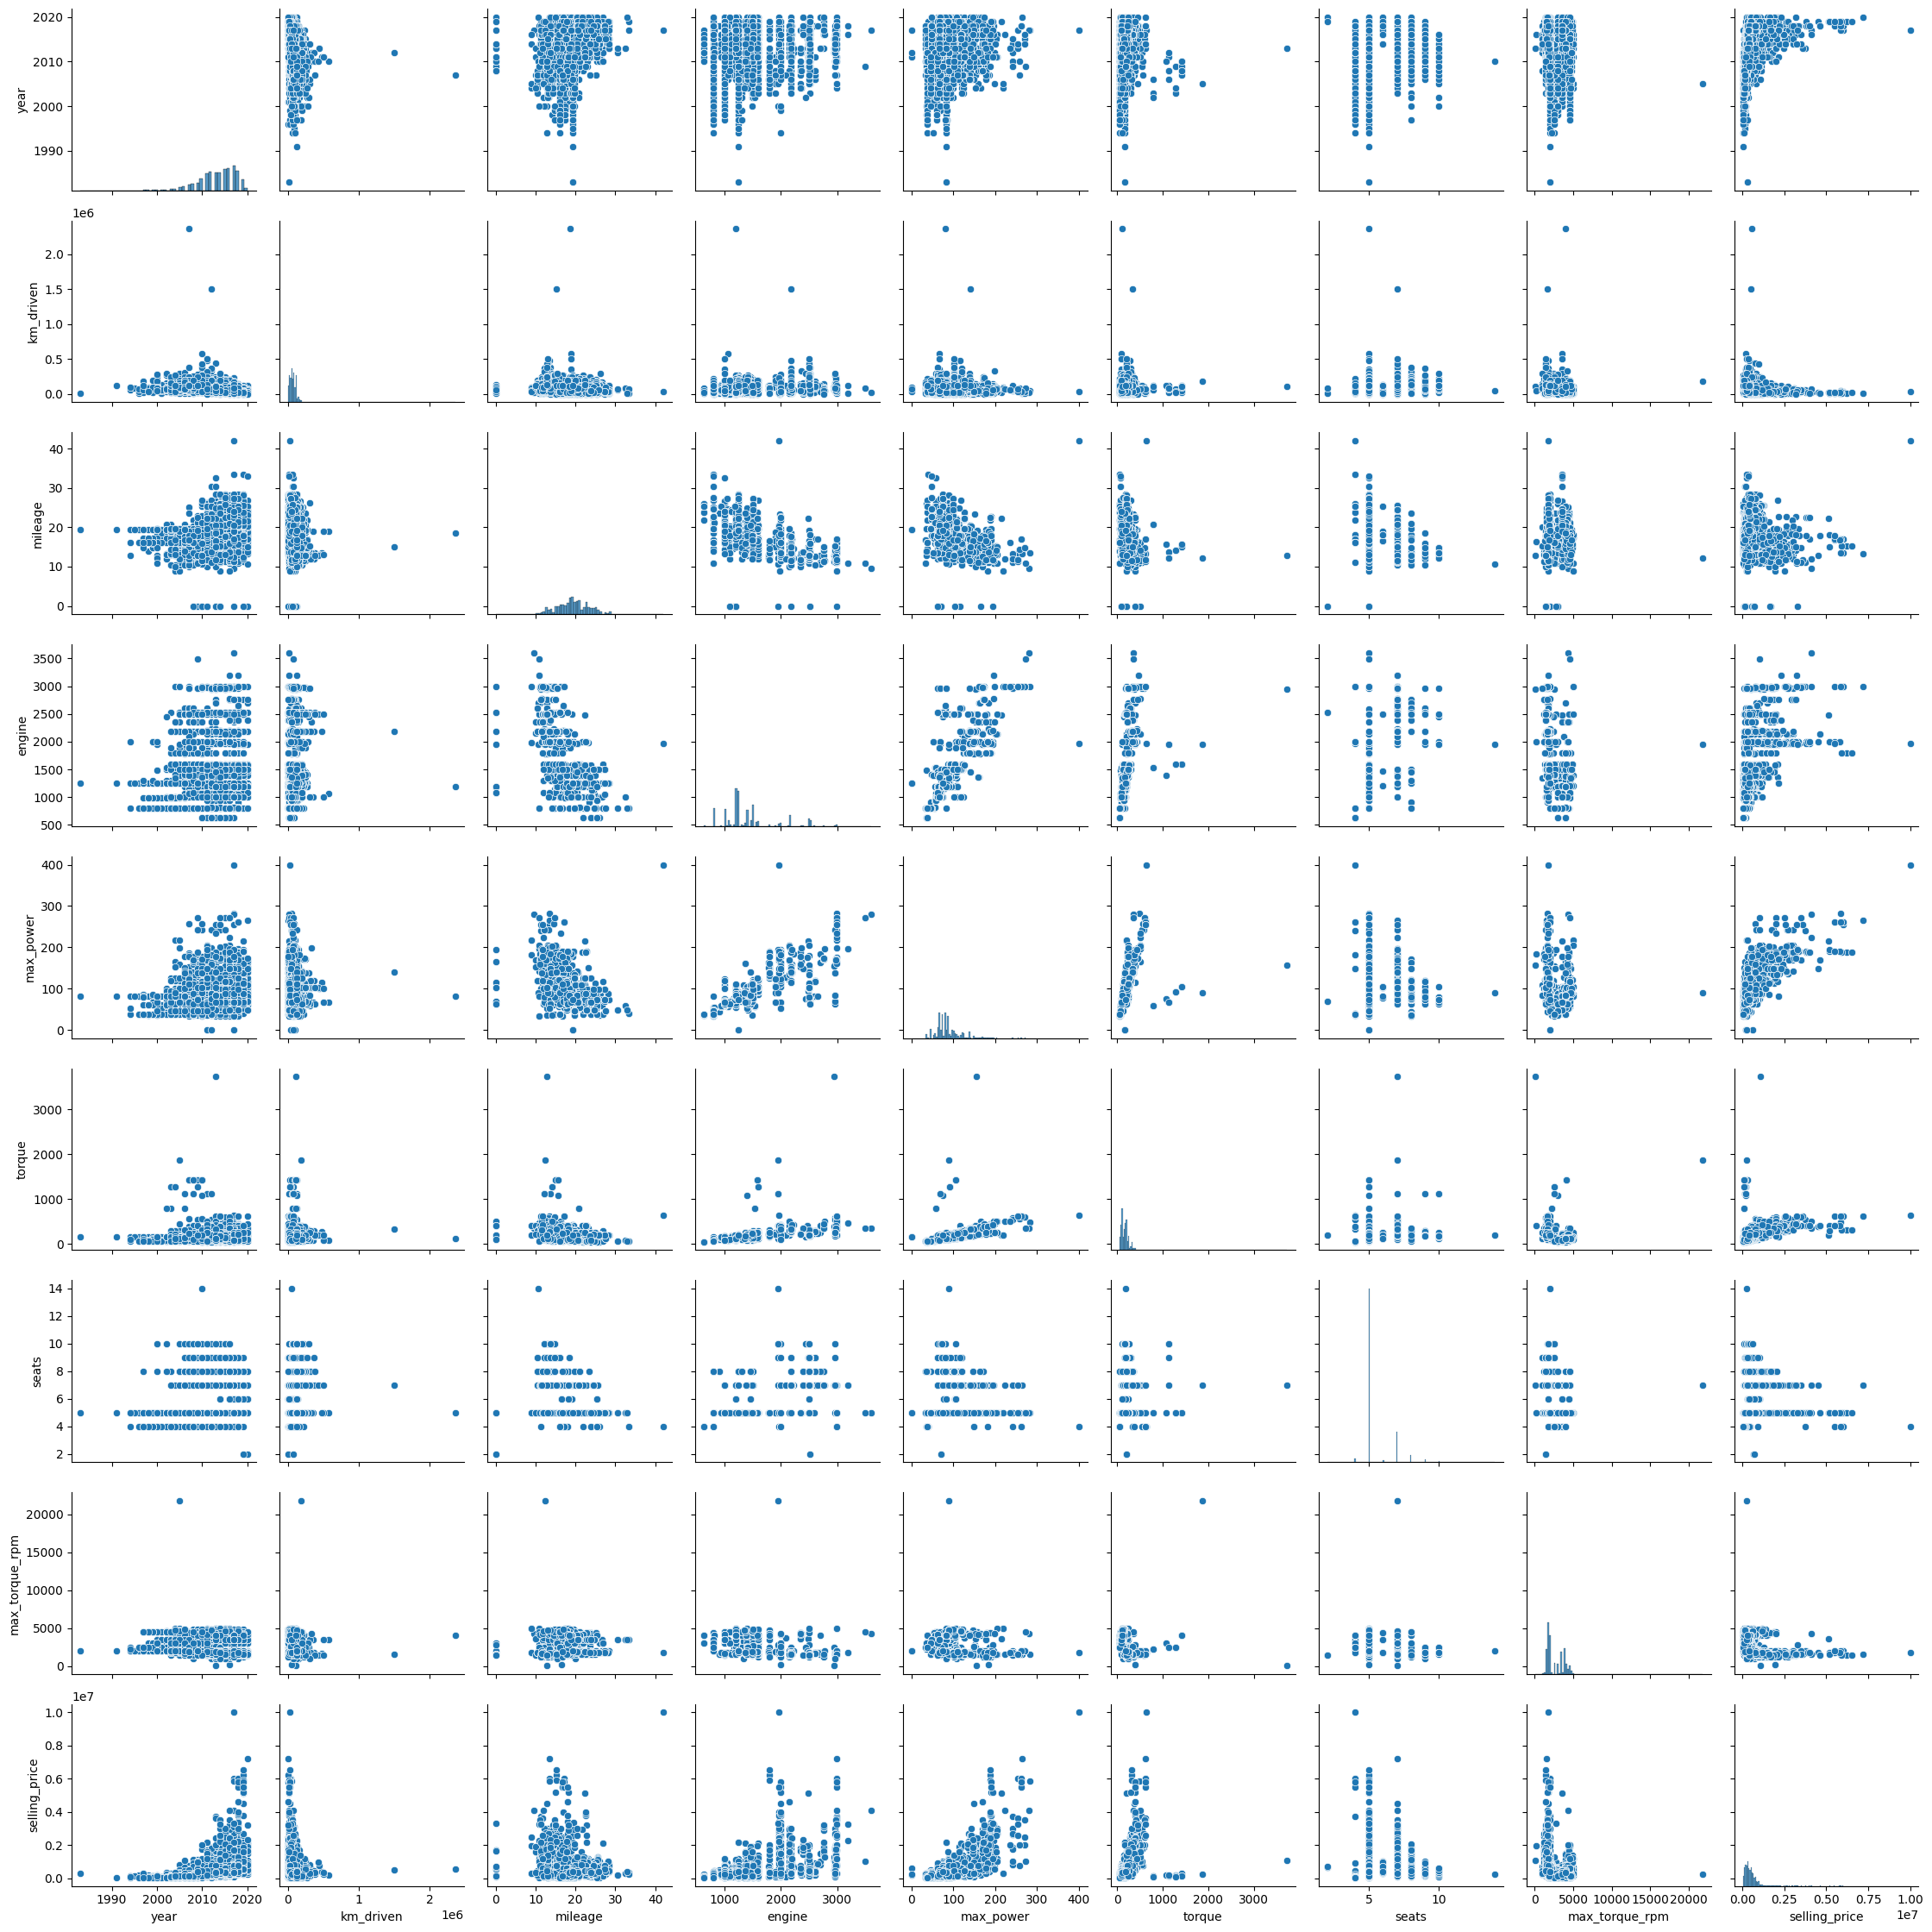

In [16]:
%matplotlib inline
numeric_columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm', 'selling_price']

plt.figure(figsize=(7, 7))
sns.pairplot(df_train[numeric_columns])
plt.tight_layout()
plt.title = 'train'
plt.show()

1) Можно ли предположить на основе распределений связь признаков с целевой переменной?
- Да, можно, например, чем больше `year` / `engine` / `max_power`, тем больше цена, при увеличении `km_driven` стоимость падает.

2) Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
- Все так же можно, но становится тяжелее делать это смотря на графикики (проще смотреть на матрицу), например, при увеличении `engine` увеличивается `max_power`

<Figure size 700x700 with 0 Axes>

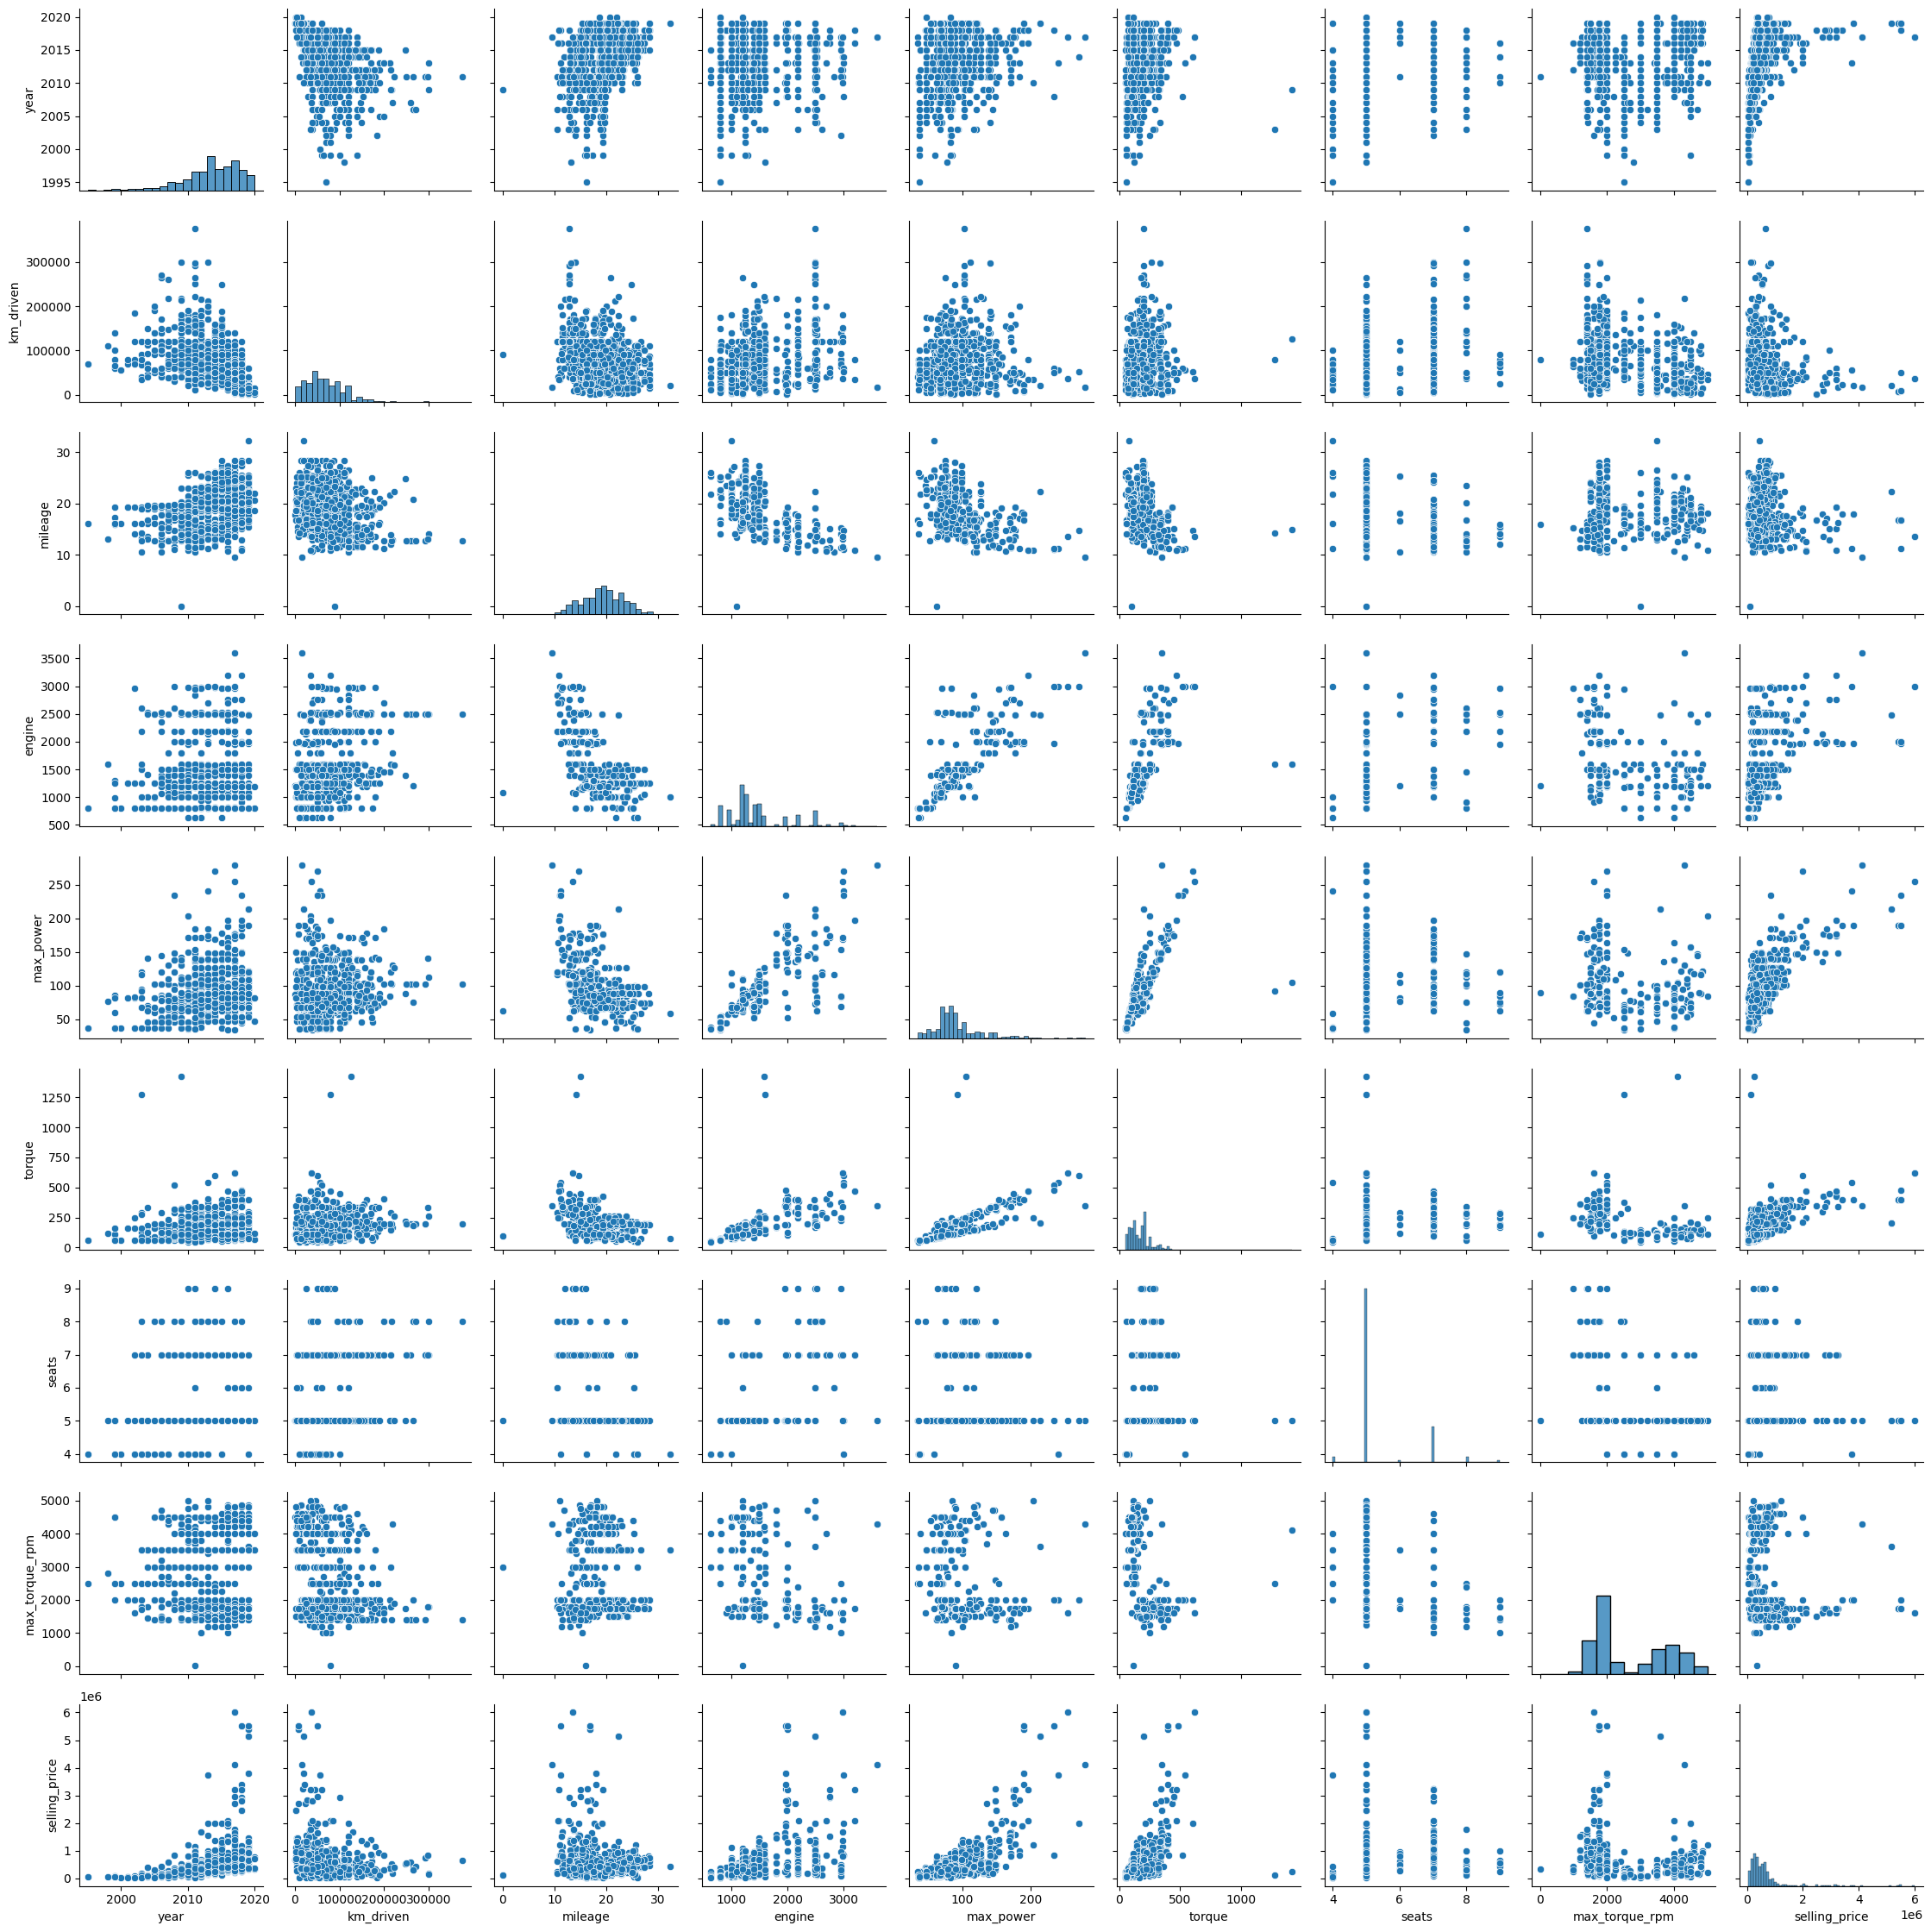

In [17]:
plt.figure(figsize=(7, 7))
sns.pairplot(df_test[numeric_columns])
plt.tight_layout()
plt.title = 'test'
plt.show()

Да, в основном похожи.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

year  km_driven   mileage    engine  max_power    torque  \
year            1.000000  -0.368966  0.341334  0.002819   0.156858  0.048262   
km_driven      -0.368966   1.000000 -0.182086  0.229766   0.024588  0.106602   
mileage         0.341334  -0.182086  1.000000 -0.572893  -0.373390 -0.226219   
engine          0.002819   0.229766 -0.572893  1.000000   0.681117  0.566066   
max_power       0.156858   0.024588 -0.373390  0.681117   1.000000  0.616197   
torque          0.048262   0.106602 -0.226219  0.566066   0.616197  1.000000   
seats           0.041178   0.192328 -0.451059  0.652172   0.244112  0.298097   
max_torque_rpm  0.008722  -0.237342 -0.009898 -0.475663  -0.257791 -0.403166   
selling_price   0.427279  -0.164828 -0.104769  0.447672   0.692814  0.433124   

                   seats  max_torque_rpm  selling_price  
year            0.041178        0.008722       0.427279  
km_driven       0.192328       -0.237342      -0.164828  
mileage        -0.451059       -0.009898      -0.104769  
engine          0.652172       -0.475663       0.447672  
max_power       0.244112       -0.257791       0.692814  
torque          0.298097       -0.403166       0.433124  
seats           1.000000       -0.353292       0.149953  
max_torque_rpm -0.353292        1.000000      -0.241327  
selling_price   0.149953       -0.241327       1.000000

<Axes: >

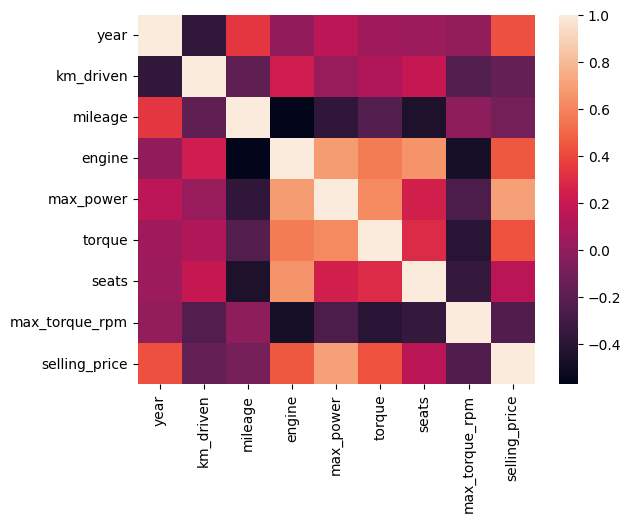

In [18]:
corr = df_train[numeric_columns].corr(method='pearson')
display(corr)
display(sns.heatmap(corr))

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

1) Какие 2 признака наименее скоррелированы между собой?
- `engine` и `year` (имеют минимальный модуль корреляции)

2) Между какими наблюдается довольно сильная положительная линейная зависимость?
- Дольно сильная положительная связь наблюдается между `max_power` и `engine`, но значение все еще далеко от 1.

3) Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
- Такая связь наблюдается, да, но нельзя утверждать с полной уверенностью.

4) Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?
- Можно использовать следующие типы корреляции - `pearson` (выделяет линейную связь, чувствителен к выбросам), `spearman` (выделяет монотонную связь, устойчив к выбросам), `kendall` (используеся для малых выборок, устойчив к выбросам). По умолчанию используется `pearson` (аналогично и в данном задании).

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [19]:
def spearman_corr(df, columns):
    spearman_corr_matrix = np.zeros((len(columns), len(columns)))

    for i, column_1 in enumerate(columns):
        for j, column_2 in enumerate(columns):
            x_ranks = np.argsort(np.argsort(df[column_1])) + 1
            y_ranks = np.argsort(np.argsort(df[column_2])) + 1

            d = x_ranks - y_ranks
            n = len(df[column_1])

            spearman_corr_matrix[i, j] = 1 - (6 * np.sum(d**2)) / (n * (n**2 - 1))

    return spearman_corr_matrix

custom_spearman_corr_matrix = spearman_corr(df_train, numeric_columns)
print('custom spearman_corr_matrix:\n', custom_spearman_corr_matrix)

spearman_corr_matrix =  df_train[numeric_columns].corr(method='spearman')

display("pd.corr(method='spearman'):", df_train[numeric_columns].corr(method='spearman'))

print(f'diff: { np.abs(custom_spearman_corr_matrix - spearman_corr_matrix.values).max()}')

custom spearman_corr_matrix:
 [[ 1.         -0.56621813  0.34295975 -0.03467668  0.16687537  0.10394279
   0.05048545 -0.03512926  0.7050605 ]
 [-0.56621813  1.         -0.19768735  0.30341074  0.04046356  0.24211079
   0.10545427 -0.28873402 -0.29569865]
 [ 0.34295975 -0.19768735  1.         -0.42898709 -0.30868377 -0.16295087
  -0.30722079  0.04384199  0.02616373]
 [-0.03467668  0.30341074 -0.42898709  1.          0.71152631  0.84011133
   0.36166019 -0.58847141  0.46186566]
 [ 0.16687537  0.04046356 -0.30868377  0.71152631  1.          0.7788051
   0.20068732 -0.34517461  0.61235243]
 [ 0.10394279  0.24211079 -0.16295087  0.84011133  0.7788051   1.
   0.286431   -0.7432708   0.5815615 ]
 [ 0.05048545  0.10545427 -0.30722079  0.36166019  0.20068732  0.286431
   1.         -0.29162089  0.22067013]
 [-0.03512926 -0.28873402  0.04384199 -0.58847141 -0.34517461 -0.7432708
  -0.29162089  1.         -0.36614771]
 [ 0.7050605  -0.29569865  0.02616373  0.46186566  0.61235243  0.5815615
   0.

"pd.corr(method='spearman'):"

year  km_driven   mileage    engine  max_power    torque  \
year            1.000000  -0.569659  0.346132 -0.038056   0.165798  0.102603   
km_driven      -0.569659   1.000000 -0.198466  0.304504   0.040919  0.242934   
mileage         0.346132  -0.198466  1.000000 -0.429871  -0.308824 -0.162381   
engine         -0.038056   0.304504 -0.429871  1.000000   0.713113  0.842430   
max_power       0.165798   0.040919 -0.308824  0.713113   1.000000  0.779600   
torque          0.102603   0.242934 -0.162381  0.842430   0.779600  1.000000   
seats           0.048291   0.195317 -0.435458  0.527716   0.304857  0.438233   
max_torque_rpm -0.032079  -0.290672  0.044996 -0.593889  -0.346567 -0.747344   
selling_price   0.707123  -0.295665  0.026186  0.463577   0.612258  0.582414   

                   seats  max_torque_rpm  selling_price  
year            0.048291       -0.032079       0.707123  
km_driven       0.195317       -0.290672      -0.295665  
mileage        -0.435458        0.044996       0.026186  
engine          0.527716       -0.593889       0.463577  
max_power       0.304857       -0.346567       0.612258  
torque          0.438233       -0.747344       0.582414  
seats           1.000000       -0.463827       0.317605  
max_torque_rpm -0.463827        1.000000      -0.367129  
selling_price   0.317605       -0.367129       1.000000

diff: 0.1722061621955796


В целом получилось сохранить зависимости, хоть и есть дифф.

In [20]:
import phik

phik_corr_matrix = df_train[numeric_columns].phik_matrix()

display('phik_corr_matrix', phik_corr_matrix)

interval columns not set, guessing: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm', 'selling_price']


'phik_corr_matrix'

year  km_driven   mileage    engine  max_power    torque  \
year            1.000000   0.081574  0.279253  0.213156   0.381639  0.096307   
km_driven       0.081574   1.000000  0.081625  0.210747   0.000000  0.000000   
mileage         0.279253   0.081625  1.000000  0.588155   0.687235  0.204598   
engine          0.213156   0.210747  0.588155  1.000000   0.720780  0.466097   
max_power       0.381639   0.000000  0.687235  0.720780   1.000000  0.577329   
torque          0.096307   0.000000  0.204598  0.466097   0.577329  1.000000   
seats           0.288178   0.096223  0.679979  0.603400   0.569587  0.206073   
max_torque_rpm  0.151274   0.023101  0.426004  0.636870   0.295280  0.744361   
selling_price   0.219841   0.000000  0.649768  0.503682   0.872166  0.423431   

                   seats  max_torque_rpm  selling_price  
year            0.288178        0.151274       0.219841  
km_driven       0.096223        0.023101       0.000000  
mileage         0.679979        0.426004       0.649768  
engine          0.603400        0.636870       0.503682  
max_power       0.569587        0.295280       0.872166  
torque          0.206073        0.744361       0.423431  
seats           1.000000        0.450495       0.196447  
max_torque_rpm  0.450495        1.000000       0.187014  
selling_price   0.196447        0.187014       1.000000

Более сильная связь между `selling_price` и `max_power`. Сам же `max_power` сильно связан с `engine`, `mileage`, `torque` и `seats` (что не так очевидно на первый взгляд, но с другой стороны мощные суперкары обычно на 1-2 человек или огромные коммерческие автомобили на большое количество людей).

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

Важно посмотреть на выбросы 

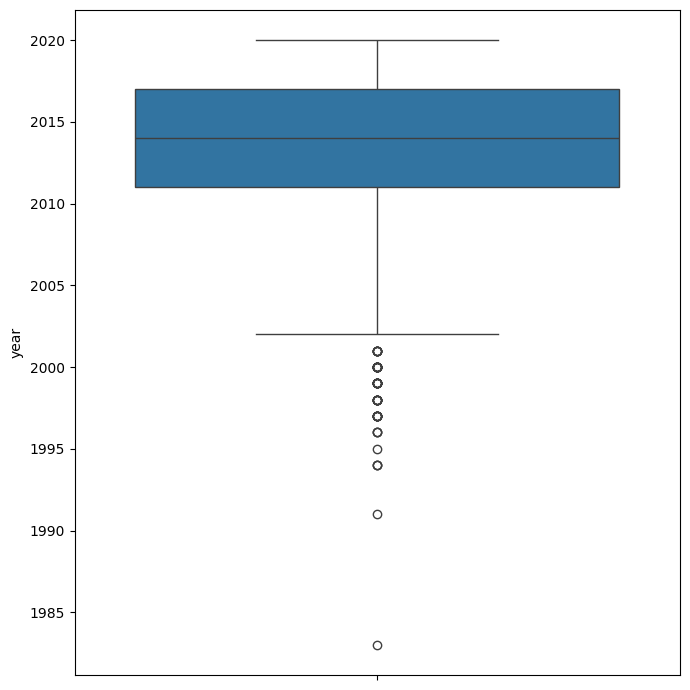

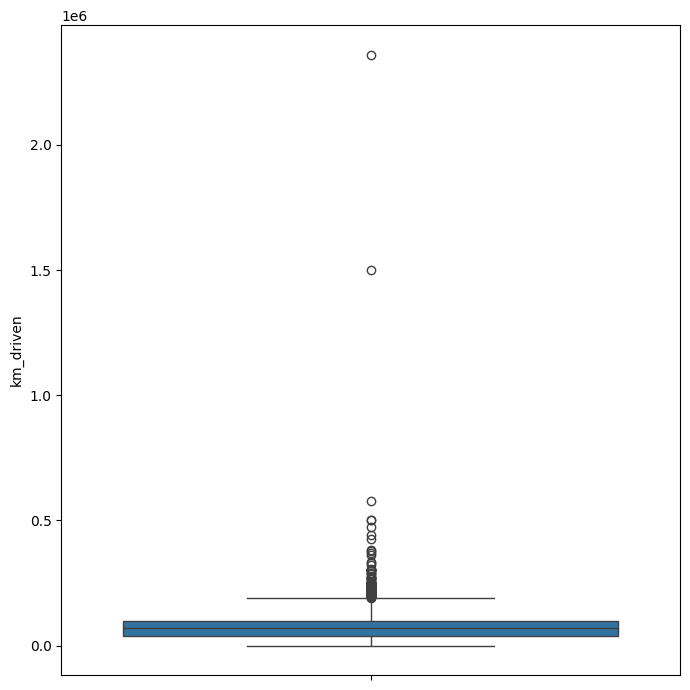

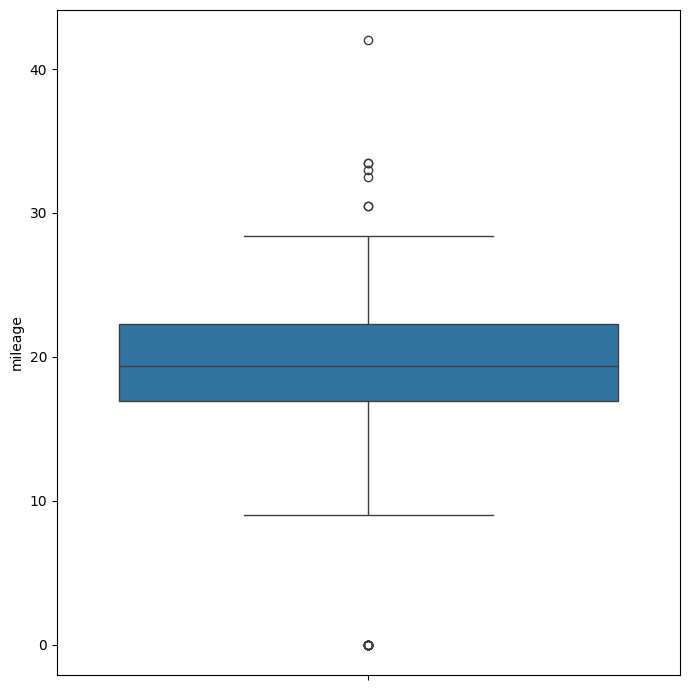

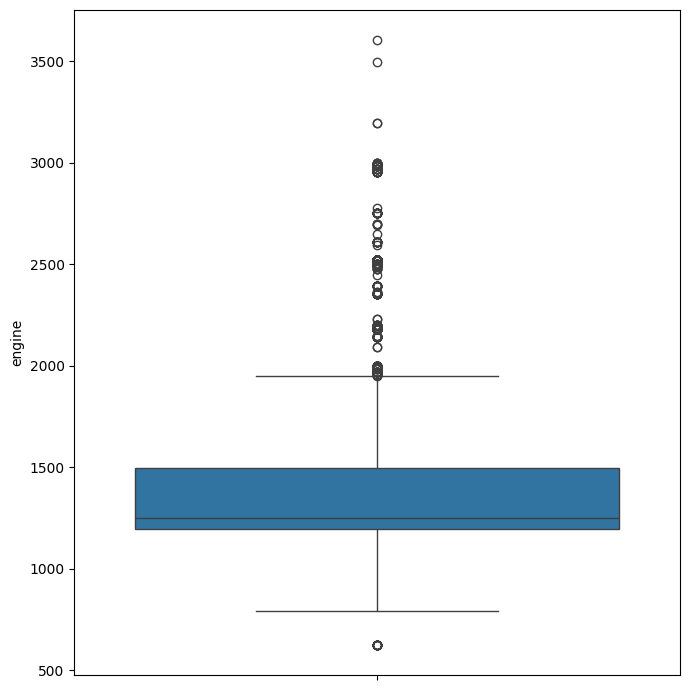

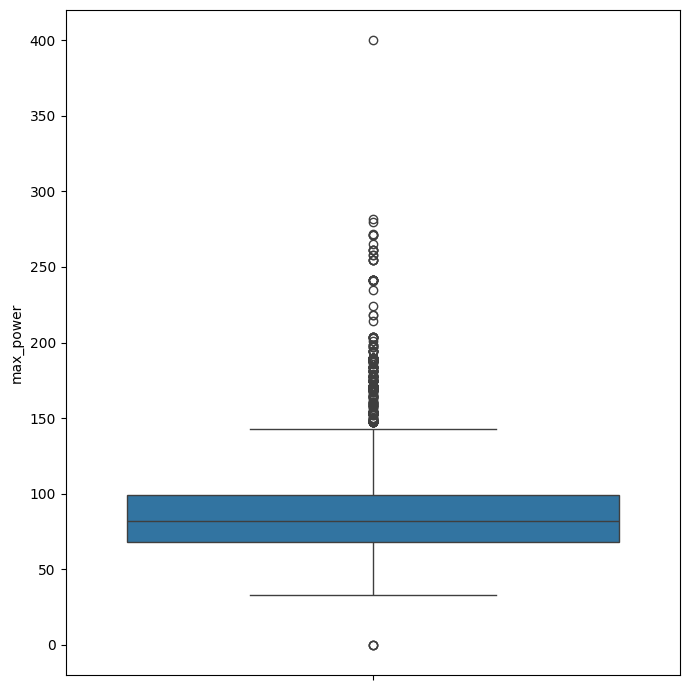

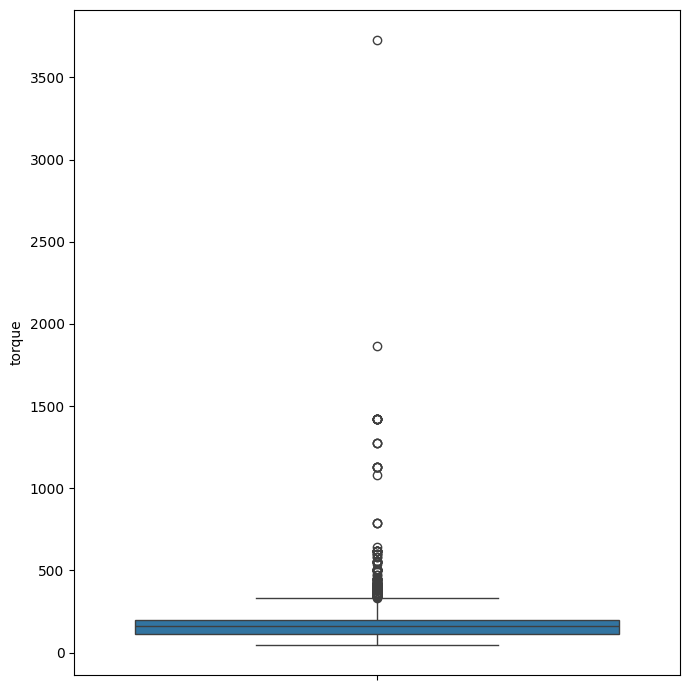

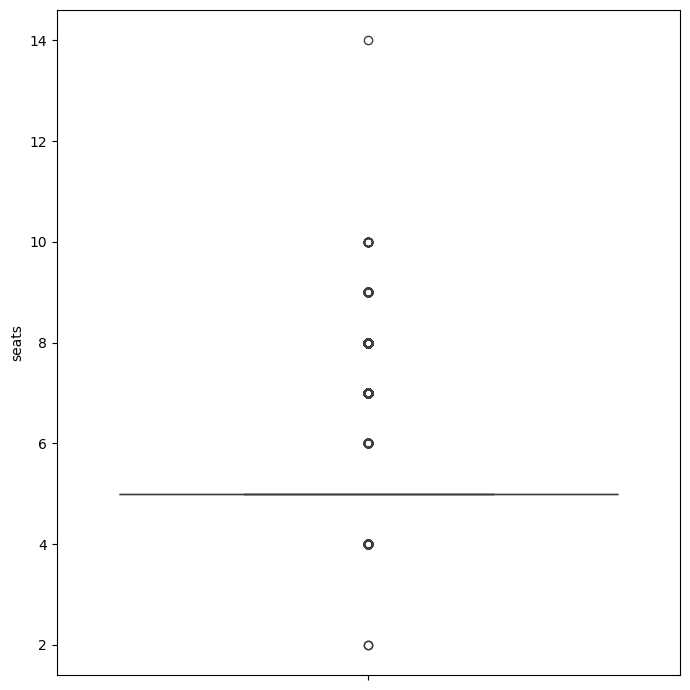

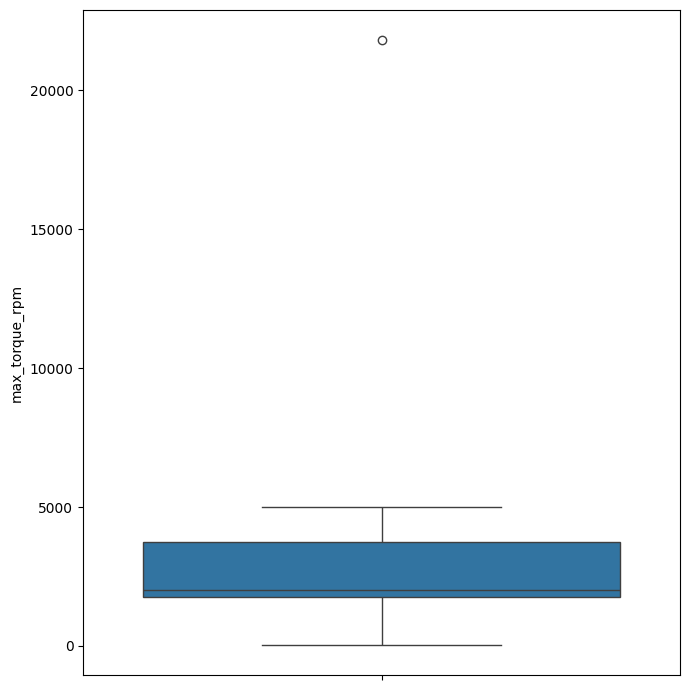

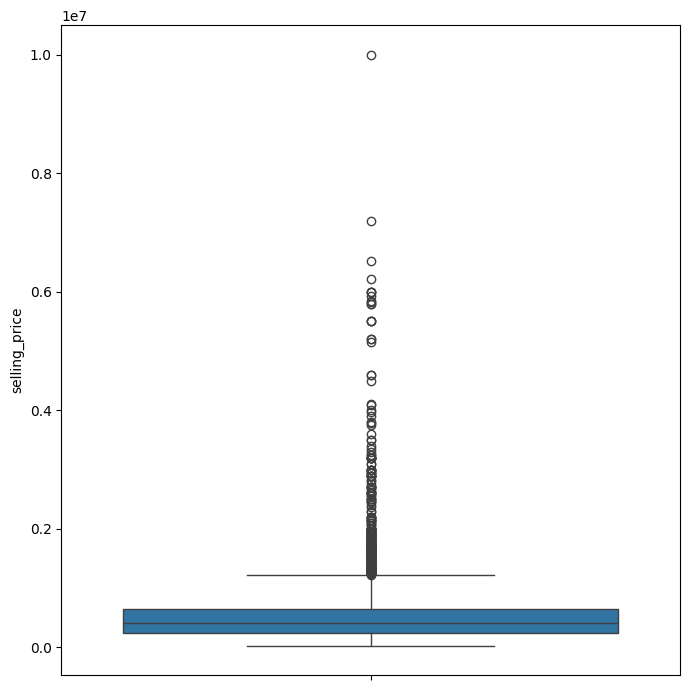

In [21]:
for feature in numeric_columns:
    plt.figure(figsize=(7, 7))
    sns.boxplot(df_train[feature])
    plt.tight_layout()
    plt.show()

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [22]:
numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']

y_train = df_train['selling_price']
X_train = df_train[numeric_features].copy()
display(X_train)

year  km_driven  mileage  engine  max_power      torque  seats  \
0     2014     145500    23.40    1248      74.00  190.000000      5   
1     2014     120000    21.14    1498     103.52  250.000000      5   
2     2010     127000    23.00    1396      90.00  219.668960      5   
3     2007     120000    16.10    1298      88.20  112.776475      5   
4     2017      45000    20.14    1197      81.86  113.750000      5   
...    ...        ...      ...     ...        ...         ...    ...   
6992  2008     191000    17.92    1086      62.10   96.100000      5   
6993  2013      50000    18.90     998      67.10   90.000000      5   
6994  2013     110000    18.50    1197      82.85  113.700000      5   
6995  2007     119000    16.80    1493     110.00  235.359600      5   
6996  2009     120000    19.30    1248      73.90  190.000000      5   

      max_torque_rpm  
0             2000.0  
1             1500.0  
2             1750.0  
3             4500.0  
4             4000.0  
...              ...  
6992          3000.0  
6993          3500.0  
6994          4000.0  
6995          1900.0  
6996          2000.0  

[5840 rows x 8 columns]

In [23]:
# были выбраны числовые признаки (seats считаем числовым)

In [24]:
y_test = df_test['selling_price']
X_test = df_test[numeric_features].copy()
display(X_test)

year  km_driven  mileage  engine  max_power     torque  seats  \
0    2010     168000    14.00    2498     112.00  260.00000      7   
1    2017      25000    21.50    1497     108.50  260.00000      5   
2    2007     218463    12.90    1799     130.00  172.00000      5   
3    2015     173000    25.10    1498      98.60  200.00000      5   
4    2011      70000    16.50    1172      65.00   96.00000      5   
..    ...        ...      ...     ...        ...        ...    ...   
995  2008     100000    19.81    1086      68.05   99.04000      5   
996  2017      50000    18.60    1197      81.83  114.70000      5   
997  2009      40000    23.00    1396      90.00  219.66896      5   
998  2012      25000    20.36    1197      78.90  111.80000      5   
999  2016     110000    26.00    1498      98.60  200.00000      5   

     max_torque_rpm  
0            1800.0  
1            1500.0  
2            4300.0  
3            1750.0  
4            3000.0  
..              ...  
995          4500.0  
996          4000.0  
997          1750.0  
998          4000.0  
999          1750.0  

[1000 rows x 8 columns]

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

y_train_lr_prediction = model.predict(X_train)
y_test_lr_prediction = model.predict(X_test)

print(f'train_R2: { r2_score(y_train, y_train_lr_prediction) }')
print(f'test_R2: { r2_score(y_test, y_test_lr_prediction)}')
print(f'train_MSE: { MSE(y_train, y_train_lr_prediction) }')
print(f'test_MSE: { MSE(y_test, y_test_lr_prediction) }')

train_R2: 0.6000415307555573
test_R2: 0.5971414829485411
train_MSE: 114643431036.39095
test_MSE: 231574579483.33575


В целом - ок, неплохо, но могло быть лучше. Об этом соответсвует метрика R2, то есть `R2 = 0.6` - не идеальный предикт (1), но достаточно хороший. А `MSE` тяжело трактовать в силу проблемы масштабов данных.

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [27]:
def custom_r2_score(truth, predict):
    return 1 - (np.sum((predict - truth)**2) / np.sum((truth - np.mean(truth))**2))

print(f'train_custom_R2: { custom_r2_score(y_train, y_train_lr_prediction) }')
print(f'test_custom_R2: { custom_r2_score(y_test, y_test_lr_prediction)}')

train_custom_R2: 0.6000415307555573
test_custom_R2: 0.5971414829485411


$$ R^2 = 1 - \dfrac{\sum_{i=1}^{n} (\hat{y}_i - y_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$


$y_i$ — наблюдаемое значение зависимой переменной,
$\hat{y}_i$ — предсказанное значение зависимой переменной,
$\bar{y}$ — среднее значение зависимой переменной,
$n$ — количество наблюдений.

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [28]:
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

$$ \bar{R}^2 = 1 - (1 - R^2)\dfrac{(n - 1)}{n - p - 1} $$

$n$ - количество наблюдений,
$p$ - количество независимых переменных в модели,
$R^2$ - коэффициент, может быть интерпретирован как дисперсия модели, на которую влияет сложность модели.

Стоит применять при сравнения моделей с разным количеством независимых переменных.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_train_lr_scaled_prediction = model_scaled.predict(X_train_scaled)
y_test_lr_scaled_prediction = model_scaled.predict(X_test_scaled)

print(f'train_R2: { r2_score(y_train, y_train_lr_scaled_prediction) }')
print(f'test_R2: { r2_score(y_test, y_test_lr_scaled_prediction)}')
print(f'train_MSE: { MSE(y_train, y_train_lr_scaled_prediction) }')
print(f'test_MSE: { MSE(y_test, y_test_lr_scaled_prediction) }')

train_R2: 0.6000415307555556
test_R2: 0.5971414829485373
train_MSE: 114643431036.39143
test_MSE: 231574579483.33795


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [30]:
pd.DataFrame(model_scaled.coef_, columns=['beta_i'], index=X_train.columns).abs().sort_values(by='beta_i')

beta_i
mileage           3479.554448
torque            4965.476989
engine           19465.239823
seats            32159.665560
km_driven        49728.073546
max_torque_rpm   59689.232630
year            162724.733648
max_power       321467.143990

Наиболее информативный признак - `max_power`.

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [31]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)

y_train_lasso_prediction = model_lasso.predict(X_train_scaled)
y_test_lasso_prediction = model_lasso.predict(X_test_scaled)

print(f'train_R2: { r2_score(y_train, y_train_lasso_prediction) }')
print(f'test_R2: { r2_score(y_test, y_test_lasso_prediction)}')
print(f'train_MSE: { MSE(y_train, y_train_lasso_prediction) }')
print(f'test_MSE: { MSE(y_test, y_test_lasso_prediction) }')

display('coefs:', pd.DataFrame(model_lasso.coef_, columns=['beta_i'], index=X_train.columns).abs().sort_values(by='beta_i'))

train_R2: 0.6000415307138144
test_R2: 0.5971402714808505
train_MSE: 114643431048.35606
test_MSE: 231575275869.55853


'coefs:'

beta_i
mileage           3476.716479
torque            4964.796667
engine           19463.294116
seats            32155.780878
km_driven        49727.106199
max_torque_rpm   59687.372244
year            162722.805332
max_power       321468.747005

Не могу сказать, что наблюдаю сильных изменений в результатах. 
Коэффиценты могли не занулиться, так как, значения по умолчанию `alpha=1` недостаточно.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [32]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 25000, 50000, 100000], # коэффициент регуляризации
    'fit_intercept': [True, False],                                             # включается ли свободный член в модель
}

grid_search_lasso = GridSearchCV(Lasso(), parameters, n_jobs=-1, verbose=1, cv=10, scoring='r2')
grid_search_lasso.fit(X_train_scaled, y_train)

print(f'best params: { grid_search_lasso.best_params_ }')
display('coefs:', pd.DataFrame(grid_search_lasso.best_estimator_.coef_, columns=['beta_i'], index=X_train.columns).abs().sort_values(by='beta_i'))

y_train_best_lasso_prediction = grid_search_lasso.best_estimator_.predict(X_train_scaled)
y_test_best_lasso_prediction = grid_search_lasso.best_estimator_.predict(X_test_scaled)

print(f'train_R2: { r2_score(y_train, y_train_best_lasso_prediction) }')
print(f'test_R2: { r2_score(y_test, y_test_best_lasso_prediction)}')
print(f'train_MSE: { MSE(y_train, y_train_best_lasso_prediction) }')
print(f'test_MSE: { MSE(y_test, y_test_best_lasso_prediction) }')

Fitting 10 folds for each of 22 candidates, totalling 220 fits
best params: {'alpha': 25000, 'fit_intercept': True}


'coefs:'

beta_i
mileage              0.000000
engine               0.000000
torque               0.000000
seats                0.000000
km_driven        24431.754583
max_torque_rpm   29801.043904
year            145430.564499
max_power       316028.969202

train_R2: 0.5909545867198127
test_R2: 0.5678363918407083
train_MSE: 117248097575.54788
test_MSE: 248419982677.70425


Пришлось обучить 220 модели (22 комбинации параметров, 10 фолдов).

Параметры `param_grid`:
- 'alpha' - коэффициент регуляризации
- 'fit_intercept' - включается ли свободный член в модель

Лучшие гиперпараметры - `best params: {'alpha': 25000, 'fit_intercept': True}`, при таких значениях часть коэффициентов занулилась.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [33]:
from sklearn.linear_model import ElasticNet

parameters = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 25000, 50000, 100000],
    'fit_intercept': [True, False],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
}

grid_search_elastic_net = GridSearchCV(ElasticNet(), parameters, verbose=1, cv=10, scoring='r2')
grid_search_elastic_net.fit(X_train_scaled, y_train)

print(f'best params: { grid_search_elastic_net.best_params_ }')
display('coefs:', pd.DataFrame(grid_search_elastic_net.best_estimator_.coef_, columns=['beta_i'], index=X_train.columns).abs().sort_values(by='beta_i'))

y_train_elastic_net_prediction = grid_search_elastic_net.best_estimator_.predict(X_train_scaled)
y_test_elastic_net_prediction = grid_search_elastic_net.best_estimator_.predict(X_test_scaled)

print(f'train_R2: { r2_score(y_train, y_train_elastic_net_prediction) }')
print(f'test_R2: { r2_score(y_test, y_test_elastic_net_prediction)}')
print(f'train_MSE: { MSE(y_train, y_train_elastic_net_prediction) }')
print(f'test_MSE: { MSE(y_test, y_test_elastic_net_prediction) }')

Fitting 10 folds for each of 110 candidates, totalling 1100 fits
best params: {'alpha': 1, 'fit_intercept': True, 'l1_ratio': 0.9}


'coefs:'

beta_i
mileage            625.187075
torque           25437.402280
seats            34135.793728
max_torque_rpm   47365.908258
engine           48908.841693
km_driven        51930.704498
year            152434.076633
max_power       268779.287827

train_R2: 0.5950984698960811
test_R2: 0.5752300772187358
train_MSE: 116060301787.55313
test_MSE: 244169881191.00772


Пришлось обучить 1100 модели (110 комбинации параметров, 10 фолдов).

Параметры `param_grid`:
- 'alpha' - коэффициент регуляризации
- 'fit_intercept' - включается ли свободный член в модель
- 'l1_ratio' - параметр для `ElasticNet`, который определяет соотношение между L1 и L2 регуляризацией (`l1_ratio = 0` - Lasso, `l1_ratio = 1` - Ridge)

Лучшие гиперпараметры - `best params: {'alpha': 1, 'fit_intercept': True, 'l1_ratio': 0.9}`.

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [34]:
from itertools import combinations

def l0_regularization(X, y, lambda_coef):
    features_count = X.shape[1]
    
    best_model = None
    best_features = None
    best_score = float('-inf')
    
    for n in range(1, features_count + 1):
        for features in combinations(range(features_count), n):
            X_cutted = X[:, features]
            
            model = LinearRegression()
            model.fit(X_cutted, y)
            
            predictions = model.predict(X_cutted)
            
            regularized_score = r2_score(y, predictions) - lambda_coef * np.count_nonzero(model.coef_)
            
            if regularized_score > best_score:
                best_score = regularized_score
                best_model = model
                best_features = features
    
    return best_model, list(best_features), best_score

for lambda_coef in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]:
    print(f'lambda = { lambda_coef }: { l0_regularization(X_train_scaled, y_train, lambda_coef) }')

lambda = 1e-05: (LinearRegression(), [0, 1, 2, 3, 4, 5, 6, 7], np.float64(0.5999615307555556))
lambda = 0.0001: (LinearRegression(), [0, 1, 3, 4, 6, 7], np.float64(0.5993818237509592))
lambda = 0.001: (LinearRegression(), [0, 1, 4, 6, 7], np.float64(0.5945695947721852))
lambda = 0.01: (LinearRegression(), [0, 4], np.float64(0.5640614392693601))
lambda = 0.1: (LinearRegression(), [0, 4], np.float64(0.38406143926936015))
lambda = 1: (LinearRegression(), [4], np.float64(-0.5200087317143401))


In [35]:
# наиболее оптимальный вариант - при lambda = 0.0001 или lambda = 0.001 (получаем меньшее количество фичей при должном скоре)
best_lambda = 0.0001

model_l0, model_l0_features, _ = l0_regularization(X_train_scaled, y_train, best_lambda)

print(f'best lambda: { best_lambda }')
print(f'model_l0_features: { model_l0_features }')

l0_features_columns = X_train.columns[model_l0_features]
display('coefs:', pd.DataFrame(model_l0.coef_, columns=['beta_i'], index=l0_features_columns).abs().sort_values(by='beta_i'))

y_train_l0_prediction = model_l0.predict(X_train_scaled[:, model_l0_features])
y_test_l0_prediction = model_l0.predict(X_test_scaled[:, model_l0_features])

print(f'train_R2: { r2_score(y_train, y_train_l0_prediction) }')
print(f'test_R2: { r2_score(y_test, y_test_l0_prediction)}')
print(f'train_MSE: { MSE(y_train, y_train_l0_prediction) }')
print(f'test_MSE: { MSE(y_test, y_test_l0_prediction) }')

best lambda: 0.0001
model_l0_features: [0, 1, 3, 4, 6, 7]


'coefs:'

beta_i
engine           21934.200717
seats            31221.659840
km_driven        49872.915915
max_torque_rpm   59465.659080
year            161245.678150
max_power       324208.659918

train_R2: 0.5999818237509592
test_R2: 0.5971871582999251
train_MSE: 114660545352.97725
test_MSE: 231548323987.07144


# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [36]:
# предполагаем, что влияние бренда на цену преобладает над влиянием модели на цену среди 1 бренда 
# (пренебрегаем модельным рядом, оставляем только бренд)
display('train name column before:', df_train['name'])
for df in both_datasets:   
    df['name'] = df['name'].str.split(' ').str[0]
display('train name column:', df_train['name'])

'train name column before:'

0                  Maruti Swift Dzire VDI
1            Skoda Rapid 1.5 TDI Ambition
2               Hyundai i20 Sportz Diesel
3                  Maruti Swift VXI BSIII
4           Hyundai Xcent 1.2 VTVT E Plus
                      ...                
6992              Hyundai Santro Xing GLS
6993    Maruti Wagon R VXI BS IV with ABS
6994                    Hyundai i20 Magna
6995                Hyundai Verna CRDi SX
6996               Maruti Swift Dzire ZDi
Name: name, Length: 5840, dtype: object

/var/folders/7_/vcg36nz547b3lv5ft63fzcbc0000gn/T/ipykernel_32069/1009766531.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].str.split(' ').str[0]


'train name column:'

0        Maruti
1         Skoda
2       Hyundai
3        Maruti
4       Hyundai
         ...   
6992    Hyundai
6993     Maruti
6994    Hyundai
6995    Hyundai
6996     Maruti
Name: name, Length: 5840, dtype: object

In [37]:
# не очень понял по заданию, что тут должно быть cat - categorial (но почему тогда 11?)
# assert X_train_cat.shape == (5840, 11)

categorial_columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']
X_train_cat = df_train[categorial_columns]
assert X_train_cat.shape == (5840, 6)

X_test_cat = df_test[categorial_columns]

In [38]:
display('categorial train:', X_train_cat.describe(include='object'))
display('categorial test:', X_test_cat.describe(include='object'))

'categorial train:'

name    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      30       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603

'categorial test:'

name    fuel seller_type transmission        owner
count     1000    1000        1000         1000         1000
unique      25       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq       290     534         837          877          623

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [39]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_cat_encoded = pd.get_dummies(X_train_cat, columns=categorial_columns, drop_first=True)
encoded_train_columns = X_train_cat_encoded.columns
print(f'one hot encoded train columns (count - { len(encoded_train_columns) }): { encoded_train_columns }')

X_test_cat_encoded = pd.get_dummies(X_test_cat, columns=categorial_columns, drop_first=True)
encoded_test_columns = X_test_cat_encoded.columns
print(f'one hot encoded test columns (count - { len(encoded_test_columns) }): { encoded_test_columns }')

encoded_train_columns_set = set(encoded_train_columns)
encoded_test_columns_set = set(encoded_test_columns)
    
for col in encoded_test_columns_set - encoded_train_columns_set:
    X_test_cat_encoded = X_test_cat_encoded.drop(col, axis=1)

X_test_cat_encoded = X_test_cat_encoded.reindex(columns=X_train_cat_encoded.columns, fill_value=False)

encoded_train_columns = X_train_cat_encoded.columns
print(f'one hot encoded train columns after proccessing missing columns (count - { len(encoded_train_columns) }): { encoded_train_columns }')
encoded_test_columns = X_test_cat_encoded.columns
print(f'one hot encoded test columns after proccessing missing columns (count - { len(encoded_test_columns) }): { encoded_test_columns }')

one hot encoded train columns (count - 47): Index(['name_Audi', 'name_BMW', 'name_Chevrolet', 'name_Daewoo', 'name_Datsun',
       'name_Fiat', 'name_Force', 'name_Ford', 'name_Honda', 'name_Hyundai',
       'name_Isuzu', 'name_Jaguar', 'name_Jeep', 'name_Kia', 'name_Land',
       'name_Lexus', 'name_MG', 'name_Mahindra', 'name_Maruti',
       'name_Mercedes-Benz', 'name_Mitsubishi', 'name_Nissan', 'name_Peugeot',
       'name_Renault', 'name_Skoda', 'name_Tata', 'name_Toyota',
       'name_Volkswagen', 'name_Volvo', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'seats_4', 'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9',
       'seats_10', 'seats_14'],
      dtype='object')
one hot encoded test columns (count - 39): Index(['name_Ashok', 'name_Audi', 'name_BMW', 'name_Chevrolet', 'n

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

1) Как корректно работать с OHE преобразованием?
- Стоит ориентироваться только на `train`, если в `test` есть уникальные категории, их стоит удалить.
- Если всего $n$ уникальный значений одной категории, то должно в итоге получться $n-1$ столбец признаков (стоит удалить 1 значение, так как оно легко вычисляется из знания, что сумма всех признаков 1)

2) Почему мы удаляем один столбец?
- Для того, чтобы убрать линейную зависимость в данных 
- Уменьшение размерности

3) Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?
- Можно, да, но нужно учитывать:
    - что теряется детализация данных (следовательно, интерпретируемость). То есть, если изначально были категории "A", "B", "C", после удаления "B" и "C" получим категории "А" и "не А".
    - не всегда стоит опираться на веса в определении важности столбца

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000, 10000, 25000, 50000, 100000],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga'],
}

X_train_with_cat_encoded = pd.concat(
    [
        pd.DataFrame(X_train_scaled, columns=numeric_features).reset_index(drop=True), 
        X_train_cat_encoded.reset_index(drop=True),
    ], 
    axis=1,
)
X_test_with_cat_encoded = pd.concat(
    [
        pd.DataFrame(X_test_scaled, columns=numeric_features).reset_index(drop=True), 
        X_test_cat_encoded.reset_index(drop=True),
    ], 
    axis=1,
)

grid_search_ridge = GridSearchCV(Ridge(), parameters, verbose=1, cv=10, scoring='r2')
grid_search_ridge.fit(X_train_with_cat_encoded, y_train)

print(f'best params: { grid_search_ridge.best_params_ }')
display('coefs:', pd.DataFrame(grid_search_ridge.best_estimator_.coef_, columns=['beta_i'], index=X_train_with_cat_encoded.columns).abs().sort_values(by='beta_i'))

y_train_ridge_prediction = grid_search_ridge.best_estimator_.predict(X_train_with_cat_encoded)
y_test_ridge_prediction = grid_search_ridge.best_estimator_.predict(X_test_with_cat_encoded)

print(f'train_R2: { r2_score(y_train, y_train_ridge_prediction) }')
print(f'test_R2: { r2_score(y_test, y_test_ridge_prediction)}')
print(f'train_MSE: { MSE(y_train, y_train_ridge_prediction) }')
print(f'test_MSE: { MSE(y_test, y_test_ridge_prediction) }')

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


/Users/obbrnu/Study/venv1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/obbrnu/Study/venv1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/obbrnu/Study/venv1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/obbrnu/Study/venv1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/obbrnu/Study/venv1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/obbrnu/Study/venv1/lib/python3.11/site-pack

best params: {'alpha': 1, 'fit_intercept': True, 'solver': 'saga'}


/Users/obbrnu/Study/venv1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


'coefs:'

beta_i
name_Peugeot                  1.642682e+03
seats_14                      4.010080e+03
torque                        6.689581e+03
seats_9                       9.165340e+03
seats                         1.274676e+04
seats_7                       1.315921e+04
mileage                       1.323275e+04
name_Kia                      1.703905e+04
km_driven                     2.889869e+04
engine                        2.963461e+04
max_torque_rpm                3.515077e+04
owner_Third Owner             3.708153e+04
owner_Fourth & Above Owner    4.007974e+04
seller_type_Trustmark Dealer  4.417234e+04
fuel_Petrol                   5.544490e+04
owner_Second Owner            5.570712e+04
name_Isuzu                    5.643217e+04
name_Daewoo                   6.366288e+04
seats_8                       6.473951e+04
seller_type_Individual        6.676307e+04
fuel_Diesel                   6.734459e+04
name_Mitsubishi               6.747557e+04
seats_10                      7.660631e+04
name_MG                       7.771880e+04
transmission_Manual           9.546786e+04
seats_5                       1.027626e+05
name_Jeep                     1.252612e+05
seats_6                       1.457236e+05
name_Toyota                   1.574323e+05
year                          1.676840e+05
fuel_LPG                      1.703257e+05
max_power                     2.021358e+05
name_Force                    2.572573e+05
seats_4                       3.038829e+05
name_Maruti                   3.367370e+05
name_Hyundai                  3.850822e+05
name_Nissan                   4.053777e+05
name_Honda                    4.092382e+05
name_Ford                     4.136674e+05
name_Renault                  4.185022e+05
name_Mahindra                 4.196734e+05
name_Skoda                    4.282049e+05
name_Fiat                     4.504513e+05
name_Audi                     4.607253e+05
name_Chevrolet                4.713271e+05
name_Volkswagen               4.714051e+05
name_Datsun                   4.904636e+05
name_Tata                     5.114566e+05
name_Mercedes-Benz            5.931911e+05
name_Jaguar                   6.034691e+05
name_Land                     6.723465e+05
name_Lexus                    7.511409e+05
name_BMW                      9.873221e+05
name_Volvo                    1.568547e+06
owner_Test Drive Car          1.985330e+06

train_R2: 0.7671345752073451
test_R2: 0.769034632285422
train_MSE: 66748158423.56999
test_MSE: 132765488725.87306


In [42]:
mask_train = X_train_with_cat_encoded['owner_Test Drive Car'] != 1
mask_test = X_test_with_cat_encoded['owner_Test Drive Car'] != 1

mask_train_original = df_train['owner'] != 'Test Drive Car'
mask_test_original = df_test['owner'] != 'Test Drive Car'

X_train_with_cat_encoded_cleaned = X_train_with_cat_encoded[mask_train].drop('owner_Test Drive Car', axis=1).reset_index(drop=True)
X_test_with_cat_encoded_cleaned = X_test_with_cat_encoded[mask_test].drop('owner_Test Drive Car', axis=1).reset_index(drop=True)

y_train_cleaned = y_train[mask_train_original].reset_index(drop=True)
y_test_cleaned = y_test[mask_test_original].reset_index(drop=True)

df_train_cleaned = df_train[mask_train_original].reset_index(drop=True)
df_test_cleaned = df_test[mask_test_original].reset_index(drop=True)


parameters = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000, 10000, 25000, 50000, 100000],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga'],
}

grid_search_ridge_cleaned = GridSearchCV(Ridge(), parameters, verbose=1, cv=10, scoring='r2')
grid_search_ridge_cleaned.fit(X_train_with_cat_encoded_cleaned, y_train_cleaned)

print(f'best params: { grid_search_ridge_cleaned.best_params_ }')
display('coefs:', pd.DataFrame(grid_search_ridge_cleaned.best_estimator_.coef_, columns=['beta_i'], index=X_train_with_cat_encoded_cleaned.columns).abs().sort_values(by='beta_i'))

y_train_ridge_cleaned_prediction = grid_search_ridge_cleaned.best_estimator_.predict(X_train_with_cat_encoded_cleaned)
y_test_ridge_cleaned_prediction = grid_search_ridge_cleaned.best_estimator_.predict(X_test_with_cat_encoded_cleaned)

y_train_ridge_cleaned_prediction_r2 = r2_score(y_train_cleaned, y_train_ridge_cleaned_prediction)
y_test_ridge_cleaned_prediction_r2 = r2_score(y_test_cleaned, y_test_ridge_cleaned_prediction)
y_train_ridge_cleaned_prediction_mse = MSE(y_train_cleaned, y_train_ridge_cleaned_prediction)
y_test_ridge_cleaned_prediction_mse = MSE(y_test_cleaned, y_test_ridge_cleaned_prediction)
print(f'train_R2: { y_train_ridge_cleaned_prediction_r2 }')
print(f'test_R2: { y_test_ridge_cleaned_prediction_r2 }')
print(f'train_MSE: { y_train_ridge_cleaned_prediction_mse }')
print(f'test_MSE: { y_test_ridge_cleaned_prediction_mse }')

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


/Users/obbrnu/Study/venv1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/obbrnu/Study/venv1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/obbrnu/Study/venv1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/obbrnu/Study/venv1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/obbrnu/Study/venv1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/obbrnu/Study/venv1/lib/python3.11/site-pack

best params: {'alpha': 1, 'fit_intercept': True, 'solver': 'saga'}


/Users/obbrnu/Study/venv1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


'coefs:'

beta_i
name_Peugeot                  9.678866e+02
seats_14                      4.165461e+03
torque                        6.489670e+03
name_Kia                      9.312221e+03
seats_9                       9.694439e+03
seats_7                       1.158006e+04
seats                         1.358600e+04
mileage                       1.361705e+04
max_torque_rpm                2.854417e+04
km_driven                     2.927079e+04
engine                        3.162853e+04
owner_Third Owner             3.808543e+04
seller_type_Trustmark Dealer  4.014027e+04
owner_Fourth & Above Owner    4.023267e+04
fuel_Petrol                   5.151136e+04
owner_Second Owner            5.604220e+04
name_Isuzu                    6.029916e+04
seller_type_Individual        6.223249e+04
seats_8                       6.348389e+04
name_Daewoo                   6.803482e+04
name_Mitsubishi               6.828309e+04
seats_10                      7.342614e+04
fuel_Diesel                   7.785769e+04
name_MG                       9.852392e+04
transmission_Manual           1.000620e+05
seats_5                       1.052261e+05
name_Jeep                     1.371567e+05
seats_6                       1.433031e+05
name_Toyota                   1.519106e+05
year                          1.661445e+05
fuel_LPG                      1.681015e+05
max_power                     2.009200e+05
name_Force                    2.533576e+05
name_Audi                     2.720000e+05
seats_4                       3.045468e+05
name_Maruti                   3.282197e+05
name_Hyundai                  3.766838e+05
name_Honda                    3.994063e+05
name_Nissan                   3.994658e+05
name_Ford                     4.064902e+05
name_Renault                  4.118307e+05
name_Mahindra                 4.157109e+05
name_Skoda                    4.207527e+05
name_Fiat                     4.429684e+05
name_Volkswagen               4.617715e+05
name_Chevrolet                4.661956e+05
name_Datsun                   4.824891e+05
name_Tata                     5.050555e+05
name_Mercedes-Benz            6.014504e+05
name_Jaguar                   6.099541e+05
name_Land                     6.766699e+05
name_Lexus                    7.588098e+05
name_BMW                      9.934608e+05
name_Volvo                    1.577841e+06

train_R2: 0.7602230295208953
test_R2: 0.7730040983127002
train_MSE: 64672226609.9487
test_MSE: 130492434212.27536


Да, качество весомо возросло

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [43]:
# число "лошадей" на литр объема
for df in both_datasets:
    df['hp_per_liter'] = 1000 * df['max_power'] / df['engine']
display(df_train)

/var/folders/7_/vcg36nz547b3lv5ft63fzcbc0000gn/T/ipykernel_32069/677872107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hp_per_liter'] = 1000 * df['max_power'] / df['engine']


name  year  selling_price  km_driven    fuel seller_type  \
0      Maruti  2014         450000     145500  Diesel  Individual   
1       Skoda  2014         370000     120000  Diesel  Individual   
2     Hyundai  2010         225000     127000  Diesel  Individual   
3      Maruti  2007         130000     120000  Petrol  Individual   
4     Hyundai  2017         440000      45000  Petrol  Individual   
...       ...   ...            ...        ...     ...         ...   
6992  Hyundai  2008         120000     191000  Petrol  Individual   
6993   Maruti  2013         260000      50000  Petrol  Individual   
6994  Hyundai  2013         320000     110000  Petrol  Individual   
6995  Hyundai  2007         135000     119000  Diesel  Individual   
6996   Maruti  2009         382000     120000  Diesel  Individual   

     transmission                 owner  mileage  engine  max_power  \
0          Manual           First Owner    23.40    1248      74.00   
1          Manual          Second Owner    21.14    1498     103.52   
2          Manual           First Owner    23.00    1396      90.00   
3          Manual           First Owner    16.10    1298      88.20   
4          Manual           First Owner    20.14    1197      81.86   
...           ...                   ...      ...     ...        ...   
6992       Manual           First Owner    17.92    1086      62.10   
6993       Manual          Second Owner    18.90     998      67.10   
6994       Manual           First Owner    18.50    1197      82.85   
6995       Manual  Fourth & Above Owner    16.80    1493     110.00   
6996       Manual           First Owner    19.30    1248      73.90   

          torque  seats  max_torque_rpm  hp_per_liter  
0     190.000000      5          2000.0     59.294872  
1     250.000000      5          1500.0     69.105474  
2     219.668960      5          1750.0     64.469914  
3     112.776475      5          4500.0     67.950693  
4     113.750000      5          4000.0     68.387636  
...          ...    ...             ...           ...  
6992   96.100000      5          3000.0     57.182320  
6993   90.000000      5          3500.0     67.234469  
6994  113.700000      5          4000.0     69.214703  
6995  235.359600      5          1900.0     73.677160  
6996  190.000000      5          2000.0     59.214744  

[5840 rows x 15 columns]

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [44]:
def business_metrics(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true) <= 0.1)

print(f'business_metrics for linear regression: { business_metrics(y_test, y_test_lr_prediction)}')
print(f'business_metrics for scaled linear regression: { business_metrics(y_test, y_test_lr_scaled_prediction)}')
print(f'business_metrics for Lasso regression: { business_metrics(y_test, y_test_best_lasso_prediction)}')
print(f'business_metrics for ElasticNet regression: { business_metrics(y_test, y_test_elastic_net_prediction)}')
print(f'business_metrics for L0 regularization: { business_metrics(y_test, y_test_l0_prediction)}')
print(f'business_metrics for Ridge regression: { business_metrics(y_test, y_test_ridge_prediction)}')
print(f'business_metrics for Ridge regression cleaned: { business_metrics(y_test_cleaned, y_test_ridge_cleaned_prediction)}')

business_metrics for linear regression: 0.245
business_metrics for scaled linear regression: 0.245
business_metrics for Lasso regression: 0.247
business_metrics for ElasticNet regression: 0.246
business_metrics for L0 regularization: 0.242
business_metrics for Ridge regression: 0.305
business_metrics for Ridge regression cleaned: 0.3083083083083083


Лучше всего справилась `Ridge` регрессия

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [45]:
def your_business_metrics(y_true, y_pred):
    relative_error = (y_true - y_pred) / y_true
    return (
        np.mean(np.abs(relative_error) <= 0.1) 
            - 0.05 * np.mean(relative_error < -0.1) 
            - 0.1 * np.mean(relative_error > 0.1)
    )

print(f'your_business_metrics for linear regression: { your_business_metrics(y_test, y_test_lr_prediction)}')
print(f'your_business_metrics for scaled linear regression: { your_business_metrics(y_test, y_test_lr_scaled_prediction)}')
print(f'your_business_metrics for Lasso regression: { your_business_metrics(y_test, y_test_best_lasso_prediction)}')
print(f'your_business_metrics for ElasticNet regression: { your_business_metrics(y_test, y_test_elastic_net_prediction)}')
print(f'your_business_metrics for L0 regularization: { your_business_metrics(y_test, y_test_l0_prediction)}')
print(f'your_business_metrics for Ridge regression: { your_business_metrics(y_test, y_test_ridge_prediction)}')
print(f'your_business_metrics for Ridge regression cleaned: { your_business_metrics(y_test_cleaned, y_test_ridge_cleaned_prediction)}')

your_business_metrics for linear regression: 0.18939999999999999
your_business_metrics for scaled linear regression: 0.18939999999999999
your_business_metrics for Lasso regression: 0.19224999999999998
your_business_metrics for ElasticNet regression: 0.19085000000000002
your_business_metrics for L0 regularization: 0.18624999999999997
your_business_metrics for Ridge regression: 0.25325
your_business_metrics for Ridge regression cleaned: 0.25685685685685683


Аналогично лучше всего справилась `Ridge` регрессия

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.


In [46]:
import pickle
from sklearn.pipeline import Pipeline

best_pipeline = Pipeline([
    ('scaler', scaler),
    ('model', grid_search_ridge_cleaned.best_estimator_)
])

notebook_data = {
    'pipeline': best_pipeline,
    'numeric_features': numeric_features,
    'categorical_features': categorial_columns,
    'encoded_columns': list(X_train_with_cat_encoded_cleaned.columns),
    'scaler': scaler,
    'best_model': grid_search_ridge_cleaned.best_estimator_,
    'feature_names': list(X_train_with_cat_encoded_cleaned.columns),
    'df_train_processed': df_train_cleaned.copy(),
    'df_test_processed': df_test_cleaned.copy(),
    'X_train_with_cat_encoded': X_train_with_cat_encoded_cleaned.copy(),
    'X_test_with_cat_encoded': X_test_with_cat_encoded_cleaned.copy(),
    'y_train': y_train_cleaned.copy(),
    'y_test': y_test_cleaned.copy(),
    'best_model_train_R2': y_train_ridge_cleaned_prediction_r2,
    'best_model_test_R2': y_test_ridge_cleaned_prediction_r2,
    'best_model_train_MSE': y_train_ridge_cleaned_prediction_mse,
    'best_model_test_MSE': y_test_ridge_cleaned_prediction_mse,
}

with open('notebook_data.pickle', 'wb') as f:
    pickle.dump(notebook_data, f)